In [1]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('tser_lec/Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


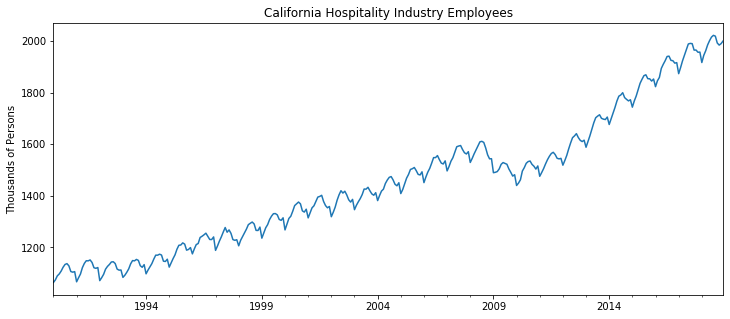

In [2]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

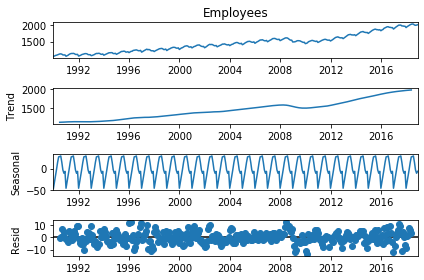

In [3]:
# DON'T WRITE HERE
result = seasonal_decompose(df['Employees'], model='add')
result.plot();

In [4]:
# DON'T WRITE HERE
auto_arima(df['Employees'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.306
Date:                              Wed, 13 May 2020   AIC                           2210.612
Time:                                      19:03:36   BIC                           2237.558
Sample:                                           0   HQIC                          2221.341
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.005      0.081      0.935      -0.010       0.011
ar.L1          0.9225      0.046     20.245      0.000       0.833       1.012
ma.L1         -0.9439      0.070    -13.421      0.000      -1.082      -0.806
ma.L2          0.1317      0.060      2.192      0.028       0.014       0.249
ar.S.L12       0.9977      0.001    717.676      0.000       0.995       1.000
ma.S.L12      -0.7569      0.042    -17.884      0.000      -0.840      -0.674
sigma2        29.1930      1.701     17.161      0.000      25.859      32.527
===================================================================================
Ljung-Box (Q):                       32.10   Jarque-Bera (JB):                66.50
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
# DON'T WRITE HERE
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [22]:
# DON'T WRITE HERE
model = SARIMAX(train['Employees'],order=(1,1,2),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Wed, 13 May 2020   AIC                           2128.116
Time:                                      21:35:30   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.284      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.649      0.000      -1.096      -0.821
ma.L2          0.1498      0.061      2.457      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    727.421      0.000       0.995       1.000
ma.S.L12      -0.7518      0.044    -17.154      0.000      -0.838      -0.666
sigma2        28.7641      1.684     17.083      0.000      25.464      32.064
===================================================================================
Ljung-Box (Q):                       29.89   Jarque-Bera (JB):                73.34
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# DON'T WRITE HERE
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,1,2)(1,0,1,12) Predictions')

In [24]:
predictions

2018-01-01    1922.288233
2018-02-01    1941.849922
2018-03-01    1959.860115
2018-04-01    1983.212628
2018-05-01    2002.918690
2018-06-01    2019.451517
2018-07-01    2026.317120
2018-08-01    2028.257425
2018-09-01    2009.875575
2018-10-01    2004.786302
2018-11-01    1996.733260
2018-12-01    2000.534942
Freq: MS, Name: SARIMA(1,1,2)(1,0,1,12) Predictions, dtype: float64

In [25]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Employees'][i]}")

predicted=1922.288233, expected=1916.8
predicted=1941.849922, expected=1944.5
predicted=1959.860115, expected=1962.2
predicted=1983.212628, expected=1984.9
predicted=2002.91869 , expected=2001.5
predicted=2019.451517, expected=2015.3
predicted=2026.31712 , expected=2022.1
predicted=2028.257425, expected=2019.1
predicted=2009.875575, expected=1992.5
predicted=2004.786302, expected=1984.3
predicted=1996.73326 , expected=1990.1
predicted=2000.534942, expected=2000.2


In [35]:
predictions.mean()

1991.3404774816383

In [36]:
test['Employees'].mean()

1986.125

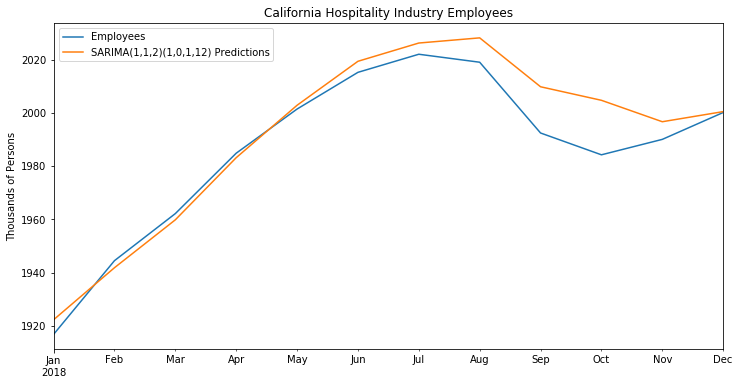

In [37]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Employees'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [38]:
# DON'T WRITE HERE
error1 = mean_squared_error(test['Employees'], predictions)
error2 = rmse(test['Employees'], predictions)
print(f'SARIMA(0,1,0)(1,0,1,12) MSE Error: {error1:11.10}')
print(f'SARIMA(0,1,0)(1,0,1,12) RMSE Error: {error2:11.10}')

SARIMA(0,1,0)(1,0,1,12) MSE Error: 77.67231212
SARIMA(0,1,0)(1,0,1,12) RMSE Error: 8.813189668


In [39]:
# DON'T WRITE HERE
model = SARIMAX(df['Employees'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Forecast')

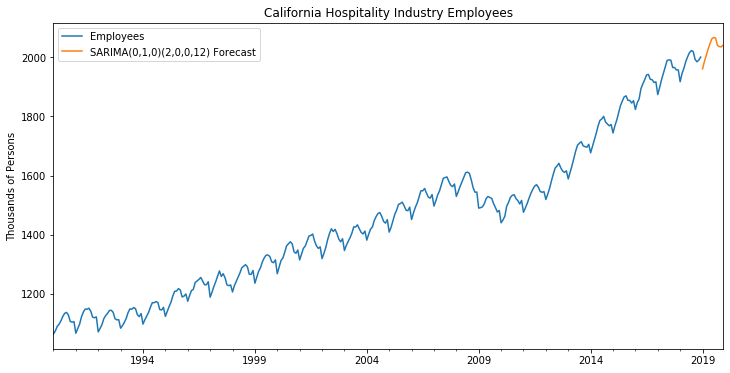

In [40]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = df['Employees'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);